In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium
%matplotlib inline

In [2]:
# 시스템 폰트 경로 리스트
font_list = mpl.font_manager.findSystemFonts()
print(font_list)

['C:\\Windows\\Fonts\\ENGR.TTF', 'C:\\Windows\\Fonts\\ANTQUAB.TTF', 'C:\\WINDOWS\\Fonts\\LeelaUIb.ttf', 'C:\\WINDOWS\\Fonts\\georgiab.ttf', 'C:\\WINDOWS\\Fonts\\mmrtextb.ttf', 'C:\\WINDOWS\\Fonts\\LFAXDI.TTF', 'C:\\WINDOWS\\Fonts\\MTEXTRA.TTF', 'C:\\Windows\\Fonts\\BASKVILL.TTF', 'C:\\Windows\\Fonts\\ERASLGHT.TTF', 'C:\\WINDOWS\\Fonts\\calibril.ttf', 'C:\\Windows\\Fonts\\trebucbd.ttf', 'C:\\WINDOWS\\Fonts\\georgia.ttf', 'C:\\WINDOWS\\Fonts\\BRUSHSCI.TTF', 'C:\\Windows\\Fonts\\LTYPEBO.TTF', 'C:\\Windows\\Fonts\\impact.ttf', 'C:\\Windows\\Fonts\\webdings.ttf', 'C:\\Windows\\Fonts\\framd.ttf', 'C:\\Windows\\Fonts\\Sitka.ttc', 'C:\\WINDOWS\\Fonts\\ariali.ttf', 'C:\\Windows\\Fonts\\ROCKEB.TTF', 'C:\\Windows\\Fonts\\COPRGTB.TTF', 'C:\\Windows\\Fonts\\micross.ttf', 'C:\\WINDOWS\\Fonts\\calibri.ttf', 'C:\\Windows\\Fonts\\GILLUBCD.TTF', 'C:\\Windows\\Fonts\\calibriz.ttf', 'C:\\WINDOWS\\Fonts\\HANBatangExt.ttf', 'C:\\WINDOWS\\Fonts\\gulim.ttc', 'C:\\Windows\\Fonts\\LTYPEO.TTF', 'C:\\Windows\\Fon

In [3]:
# Add every font at the specified location
font_dir = ['./fonts']
for font in mpl.font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    mpl.font_manager.fontManager.addfont(font)

In [4]:
# Set font family globally
mpl.rcParams['font.family'] = 'NanumSquare Neo OTF Bold'
print(mpl.rcParams['font.family'])

['NanumSquare Neo OTF Bold']


## 지역별 연령별 주민등록 인구수

In [5]:
age_live = pd.read_csv("../데이터/행정안전부_지역별(행정동) 성별 연령별 주민등록 인구수_20230228.csv",encoding = "cp949")
age_live

,행정기관코드,기준연월,시도명,시군구명,읍면동명,계,남자,여자,만0세남자,만1세남자,...,만101세여자,만102세여자,만103세여자,만104세여자,만105세여자,만106세여자,만107세여자,만108세여자,만109세여자,만110세이상여자
0,1111051500,2023-02-28,서울특별시,종로구,청운효자동,11605,5325,6280,14,22,...,1,0,0,0,0,0,0,0,0,0
1,1111053000,2023-02-28,서울특별시,종로구,사직동,9120,4060,5060,12,24,...,0,0,0,0,0,0,0,0,0,0
2,1111054000,2023-02-28,서울특별시,종로구,삼청동,2322,1104,1218,2,2,...,0,0,0,0,0,0,0,0,0,0
3,1111055000,2023-02-28,서울특별시,종로구,부암동,9178,4340,4838,13,14,...,1,1,0,0,0,0,0,0,0,0
4,1111056000,2023-02-28,서울특별시,종로구,평창동,17602,8212,9390,33,46,...,2,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574,5013058000,2023-02-28,제주특별자치도,서귀포시,서홍동,11236,5556,5680,39,49,...,1,0,0,0,0,0,0,0,0,0
3575,5013059000,2023-02-28,제주특별자치도,서귀포시,대륜동,15567,7837,7730,59,66,...,2,0,1,2,0,0,0,0,0,0
3576,5013060000,2023-02-28,제주특별자치도,서귀포시,대천동,13650,6913,6737,52,45,...,0,1,0,0,0,0,0,0,0,0
3577,5013061000,2023-02-28,제주특별자치도,서귀포시,중문동,12293,6249,6044,27,38,...,1,0,0,1,0,0,0,0,0,0


In [6]:
age_live.columns

Index(['행정기관코드', '기준연월', '시도명', '시군구명', '읍면동명', '계', '남자', '여자', '만0세남자',
       '만1세남자',
       ...
       '만101세여자', '만102세여자', '만103세여자', '만104세여자', '만105세여자', '만106세여자',
       '만107세여자', '만108세여자', '만109세여자', '만110세이상여자'],
      dtype='object', length=230)

## 10대 청소년 들만 전처리

In [7]:
for i in range(20,110):
    age_live.drop([f'만{i}세여자'],axis=1,inplace=True)

In [8]:
for i in range(20,110):
    age_live.drop([f'만{i}세남자'],axis=1,inplace=True)

In [9]:
for i in range(0,10):
    age_live.drop([f'만{i}세남자'],axis=1,inplace=True)

In [10]:
for i in range(0,10):
    age_live.drop([f'만{i}세여자'],axis=1,inplace=True)

In [11]:
age_live.drop(['만110세이상남자'],axis=1,inplace=True)

In [12]:
age_live.drop(['만110세이상여자'],axis=1,inplace=True)

## 시군구명, 계, 남자, 여자, 10대들 컬럼만 남기기

In [13]:
age_live.drop(['행정기관코드'],axis=1,inplace=True)

In [14]:
age_live.loc[0][7:]

만10세남자    57
만11세남자    61
만12세남자    57
만13세남자    54
만14세남자    60
만15세남자    60
만16세남자    58
만17세남자    54
만18세남자    70
만19세남자    58
만10세여자    52
만11세여자    52
만12세여자    58
만13세여자    47
만14세여자    61
만15세여자    61
만16세여자    73
만17세여자    36
만18세여자    50
만19세여자    43
Name: 0, dtype: object

## 서울특별시만 students_live변수에 넣기

In [15]:
students_live = age_live[age_live['시도명'] == '서울특별시']

## groupby함수를 사용하여 같은 시군구명을 가진 값으로 더한다

In [16]:
students_live = students_live.groupby(by='시군구명').sum()
students_lives = students_live[['계']]

In [17]:
students_live['남자'].loc[students_live.index[0]] = students_live.loc[students_live.index[0]][3:13].sum()
students_live.loc['강남구']

계         529962
남자         31514
여자        276464
만10세남자      2989
만11세남자      3045
만12세남자      3395
만13세남자      3076
만14세남자      3302
만15세남자      3555
만16세남자      3032
만17세남자      2984
만18세남자      3090
만19세남자      3046
만10세여자      2751
만11세여자      2745
만12세여자      3091
만13세여자      2840
만14세여자      2994
만15세여자      3200
만16세여자      2925
만17세여자      2655
만18세여자      2795
만19세여자      2825
Name: 강남구, dtype: int64

In [18]:
students_live['여자'].loc[students_live.index[0]] = students_live.loc[students_live.index[0]][13:].sum()
students_live['여자'].loc[students_live.index[0]]

28821

In [19]:
for i in range(len(students_live.index)):
    students_live['남자'].loc[students_live.index[i]] = students_live.loc[students_live.index[i]][3:13].sum()

In [20]:
for i in range(len(students_live.index)):
    students_live['여자'].loc[students_live.index[i]] = students_live.loc[students_live.index[i]][13:].sum()

In [21]:
for i in range(len(students_live.index)):
    students_live['계'].loc[students_live.index[i]] = students_live.loc[students_live.index[i]][1:3].sum()

In [22]:
students_live = students_live.sort_values(by = ['계'], ascending=False)

In [23]:
students_live.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중구
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   계       25 non-null     int64
 1   남자      25 non-null     int64
 2   여자      25 non-null     int64
 3   만10세남자  25 non-null     int64
 4   만11세남자  25 non-null     int64
 5   만12세남자  25 non-null     int64
 6   만13세남자  25 non-null     int64
 7   만14세남자  25 non-null     int64
 8   만15세남자  25 non-null     int64
 9   만16세남자  25 non-null     int64
 10  만17세남자  25 non-null     int64
 11  만18세남자  25 non-null     int64
 12  만19세남자  25 non-null     int64
 13  만10세여자  25 non-null     int64
 14  만11세여자  25 non-null     int64
 15  만12세여자  25 non-null     int64
 16  만13세여자  25 non-null     int64
 17  만14세여자  25 non-null     int64
 18  만15세여자  25 non-null     int64
 19  만16세여자  25 non-null     int64
 20  만17세여자  25 non-null     int64
 21  만18세여자  25 non-null     int64
 22  만19세여자  25 non-null     int64
dtypes: int64(23)
memory 

In [24]:
students_live

,계,남자,여자,만10세남자,만11세남자,만12세남자,만13세남자,만14세남자,만15세남자,만16세남자,...,만10세여자,만11세여자,만12세여자,만13세여자,만14세여자,만15세여자,만16세여자,만17세여자,만18세여자,만19세여자
시군구명,,,,,,,,,,,,,,,,,,,,,
강남구,60335,31514,28821,2989,3045,3395,3076,3302,3555,3032,...,2751,2745,3091,2840,2994,3200,2925,2655,2795,2825
송파구,58373,29768,28605,3112,3116,3114,2809,2915,3066,2882,...,3067,2879,2902,2800,2772,3055,2780,2590,2810,2950
노원구,49080,25391,23689,2187,2180,2361,2299,2522,2812,2527,...,2028,2065,2215,2073,2347,2534,2367,2361,2668,3031
양천구,48456,25229,23227,2373,2363,2588,2427,2656,2875,2489,...,2266,2122,2423,2244,2435,2590,2248,2234,2326,2339
서초구,44725,22671,22054,2322,2302,2458,2225,2370,2332,2262,...,2239,2161,2378,2216,2253,2441,2128,1979,2199,2060
강서구,42984,21919,21065,2301,2235,2142,2017,2077,2326,2145,...,2223,2097,2020,1832,2045,2179,2048,1968,2237,2416
강동구,39255,20745,18510,2192,2107,2160,2024,2086,2295,2013,...,2004,1864,1934,1818,1904,1871,1741,1655,1844,1875
성북구,36358,18409,17949,1754,1767,1755,1609,1714,1957,1783,...,1680,1691,1714,1588,1623,1800,1733,1612,1964,2544
은평구,36187,18518,17669,1757,1708,1803,1656,1794,1977,1915,...,1713,1623,1683,1649,1680,1867,1792,1659,1897,2106


## 청소년 거주인구 수를 이미지화 하기

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda

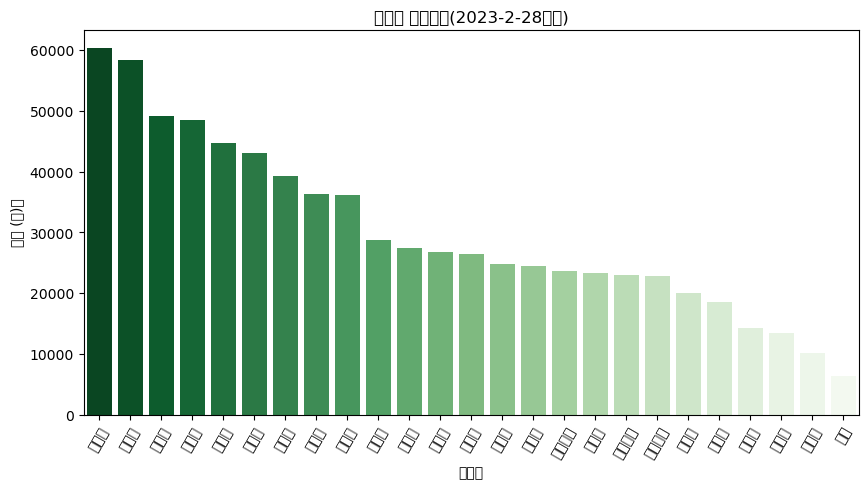

In [29]:
#students_live
plt.figure(figsize = (10,5))
sizes = students_live['계']
labels = students_live.index
sns.barplot(y = sizes, x =sizes.index, palette = "Greens_r")
plt.title("청소년 거주인구(2023-2-28기준)")

plt.xticks(rotation = 60)
plt.ylabel("인구 (명)수")
plt.xlabel("거주지")
plt.show()

In [26]:
students_pd = students_live[['계']]

In [27]:
students_pd.to_csv("students_lives.csv")